In [1]:
import pandas as pd

# data gotten from https://www.worldometers.info/world-population/south-korea-population/
korean_population=51343545   # Friday, March 11, 2022

# data for this is gotten from: https://sites.google.com/view/snuaric/data-service/covid-19/covid-19-data?authuser=0
df=pd.read_excel('Korea_dataset.xlsx')



#Please not that I need daily numbers, but the dataset has following attributes:
#Confirmed: cummulative
#RELEASE: cummulative
#death: cummulative
# quarantined: possibly cummulative (i cant judge)


# Sort data by date in ascending order
df=df.sort_values(by=['DATE'], ascending=True)
# df=df[1:len(df)]
df.tail(25)


# print (df["DATE"].min())
# print (df["DATE"].max())

,DATE,CONFIRM,RELEASE,QUARANT,DEATH,TOTAL_TEST,UNDER_TEST,NEGATIVE,seriously or critically ill case,일일 신규 입원환자수,접종총대상자,"접종동의/예약자(1, 2차)",접종대상자(2분기),접종동의/예약자(2분기),접종대상자(1분기),접종동의/예약자(1분기)
24,2022-02-15,1462421.0,803005.0,652253,7163.0,NaN,NaN,NaN,314.0,1199.0,NaN,NaN,NaN,NaN,NaN,NaN
23,2022-02-16,1552851.0,825776.0,719873,7202.0,NaN,NaN,NaN,313.0,1686.0,NaN,NaN,NaN,NaN,NaN,NaN
22,2022-02-17,1645978.0,841233.0,797507,7238.0,NaN,NaN,NaN,389.0,1496.0,NaN,NaN,NaN,NaN,NaN,NaN
21,2022-02-18,1755806.0,852368.0,896155,7283.0,NaN,NaN,NaN,385.0,1507.0,NaN,NaN,NaN,NaN,NaN,NaN
20,2022-02-19,1858009.0,869695.0,980960,7354.0,NaN,NaN,NaN,408.0,1479.0,NaN,NaN,NaN,NaN,NaN,NaN
19,2022-02-20,1962837.0,892289.0,1063143,7405.0,NaN,NaN,NaN,439.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2022-02-21,2058184.0,905128.0,1145606,7450.0,NaN,NaN,NaN,480.0,1382.0,NaN,NaN,NaN,NaN,NaN,NaN
17,2022-02-22,2157734.0,.,.,7508.0,NaN,NaN,NaN,480.0,1501.0,NaN,NaN,NaN,NaN,NaN,NaN
16,2022-02-23,2329182.0,.,.,7607.0,NaN,NaN,NaN,512.0,1883.0,NaN,NaN,NaN,NaN,NaN,NaN
15,2022-02-24,2499188.0,.,.,7689.0,NaN,NaN,NaN,581.0,1818.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:

# check if there are any missing dates for which data is not recorded. If so, then print them
df_new = df.set_index('DATE')
pd.date_range(start = '2020-01-20', end = '2022-03-11' ).difference(df_new.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [6]:
print(df[['DATE']][0:df.index.max()-200-30-4])

          DATE
781 2020-01-20
780 2020-01-21
779 2020-01-22
778 2020-01-23
777 2020-01-24
..         ...
239 2021-07-15
238 2021-07-16
237 2021-07-17
236 2021-07-18
235 2021-07-19

[547 rows x 1 columns]


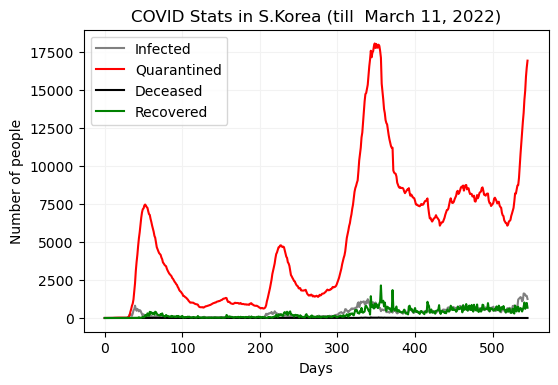

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=100)

#Cummulative numbers
infected_cum=df[['CONFIRM']][0:df.index.max()-200-30-4].to_numpy()
quarantined_cum=df[['QUARANT']][0:df.index.max()-200-30-4].to_numpy()
deceased_cum=df[['DEATH']][0:df.index.max()-200-30-4].to_numpy()
recovered_cum=df[['RELEASE']][0:df.index.max()-200-30-4].to_numpy()


#Daily numbers
infected=infected_cum[1:len(infected_cum)]-infected_cum[0:len(infected_cum)-1]
quarantined=quarantined_cum[0:len(infected_cum)-1]
deceased=deceased_cum[1:len(deceased_cum)]-deceased_cum[0:len(deceased_cum)-1]
recovered=recovered_cum[1:len(recovered_cum)]-recovered_cum[0:len(recovered_cum)-1]


oner=np.ones((len(infected),1))
residual=infected+quarantined+deceased+recovered
susceptible=korean_population*oner-residual

plt.plot(infected,color='grey')
plt.plot(quarantined,color='red')
plt.plot(deceased,color='black')
plt.plot(recovered,color='green')



plt.grid(color='0.95')
plt.legend(['Infected','Quarantined','Deceased','Recovered'])
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()


In [40]:
np.min(quarantined)

1.0

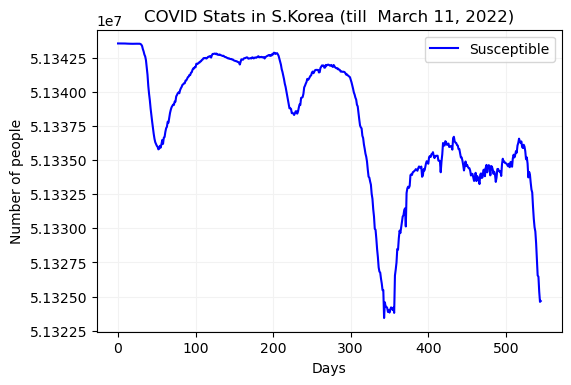

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(6, 4), dpi=100)
plt.plot(susceptible,color='blue')
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Susceptible'])
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()

Savitzky-Golay Smoothing

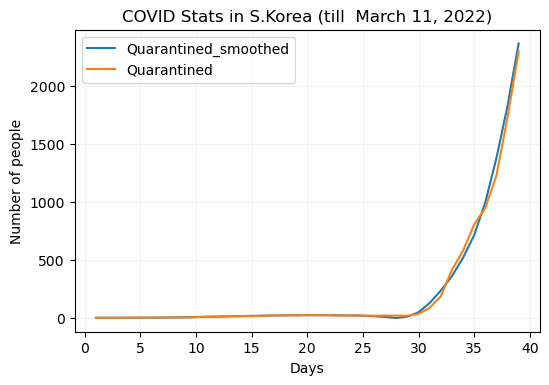

In [11]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(6, 4), dpi=100)
import numpy as np
import math
from scipy.signal import savgol_filter

days=np.arange(len(infected))

######defining factors##########
window_len=11
degree_poly=3
################

sig=np.squeeze(quarantined)
smooth_sig=savgol_filter(sig,window_len,degree_poly)


plt.plot(days[1:40],smooth_sig[1:40],days[1:40],sig[1:40])
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Quarantined_smoothed','Quarantined'])
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()

Cubic-spline interpolation

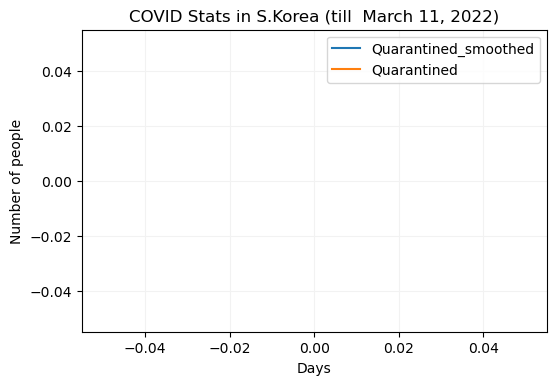

In [12]:
from scipy.interpolate import CubicSpline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(6, 4), dpi=100)

sampling_fact=10;  # defining factor

c_sig = CubicSpline(days[0:len(days):sampling_fact],sig[0:len(days):sampling_fact])
cubic_sig=c_sig(days)

plt.plot(days[600:700],cubic_sig[600:700],days[600:700],sig[600:700])
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Quarantined_smoothed','Quarantined'])
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()

Savitzky-Golay-Cubic-Spline-interpolation

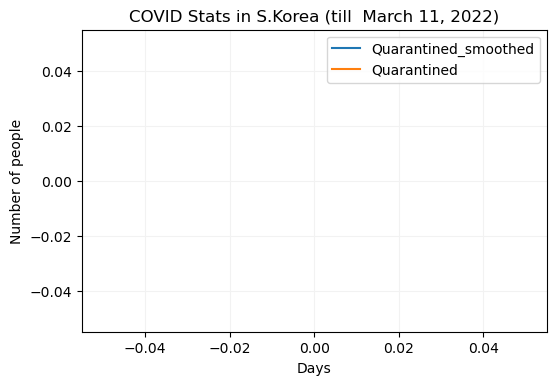

In [13]:
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)

figure(figsize=(6, 4), dpi=100)
plt.plot(days[600:700],cubic_sig_p[600:700],days[600:700],sig[600:700])
plt.grid(color='0.95')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.legend(['Quarantined_smoothed','Quarantined'])
plt.title('COVID Stats in S.Korea (till  March 11, 2022)')
plt.show()

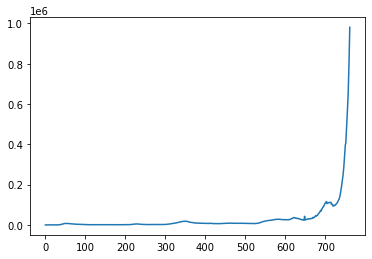

In [45]:
plt.plot(days,sig)

Data Recording of Smoothed States

In [14]:
######defining factors##########
window_len=11
degree_poly=2
sampling_fact=3;
################

#SIQRD model states:

#Susceptible
sig=np.squeeze(susceptible)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p)) 
S=cubic_sig_p


#Infected
sig=np.squeeze(infected)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
I=cubic_sig_p

#Quarantined
sig=np.squeeze(quarantined)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
Q=cubic_sig_p

#Recovered
sig=np.squeeze(recovered)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
R=cubic_sig_p

#Deceased
sig=np.squeeze(deceased)
smooth_sig=savgol_filter(sig,window_len,degree_poly)
cp_sig = CubicSpline(days[0:len(days):sampling_fact],smooth_sig[0:len(days):sampling_fact])
cubic_sig_p=cp_sig(days)
if np.min(cubic_sig_p)<0:
    cubic_sig_p=cubic_sig_p+np.abs(np.min(cubic_sig_p))
D=cubic_sig_p

data=[days,S,I,Q,R,D]
data=np.array(np.transpose(data))

print(np.min(I))
print(np.min(Q))
print(np.min(R))
print(np.min(D))
print(np.min(S))

np.savetxt("SG_spline_SIQRD.csv", data,delimiter=",")


0.0
0.8391608391608402
0.0
0.0
51323961.79908794


In [15]:
len(S)

546

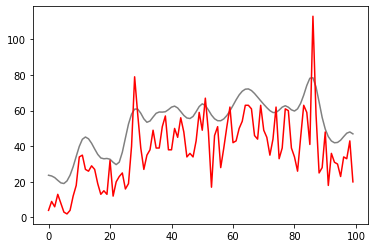

In [16]:
plt.plot(I[100:200],color='grey')
plt.plot(infected[100:200],color='red')

